In [ ]:
# load_from_csv:
# load a google benchmark run result exported in CSV format.
# 

In [90]:
import re as re
import pandas as pd

# Return a Series with either 'mean' or 'stddev' (arg) for a given benchmark name
# 1. For every row with name corresponding to $benchmark
  # 1.1 Extract value of "/($x)_arg" with arg={mean\stddev}
  # 1.2 Set pandas series index $x value to line['real_time|cpu_time']
# 2. return result series
def load_from_csv(filename, benchmark, stat='mean', value='real_time'):
    r = pd.Series();
    df = pd.read_csv(filename, skiprows=3)
    
    for index, row in df.iterrows():
        row_name = str(row['name'])
        if (benchmark in row_name) and (stat in row_name): 
            arg = re.match(".*/(\d+)_.*", row_name)
            if arg and arg.group(1):
                r.loc[arg.group(1)] = row[value]
    return r

linearize_tree_dfs_rec_mean = load_from_csv('linearize_dfs_tree.csv', stat='mean', benchmark='BM_linearize_tree_dfs_rec')
linearize_tree_dfs_rec_min = load_from_csv('linearize_dfs_tree.csv', stat='min', benchmark='BM_linearize_tree_dfs_rec')
linearize_tree_dfs_rec_max = load_from_csv('linearize_dfs_tree.csv', stat='max', benchmark='BM_linearize_tree_dfs_rec')

linearize_dfs_mean = load_from_csv('linearize_dfs_tree.csv', stat='mean', benchmark='BM_linearize_dfs_on_tree')
linearize_dfs_min = load_from_csv('linearize_dfs_tree.csv', stat='min', benchmark='BM_linearize_dfs_on_tree')
linearize_dfs_max = load_from_csv('linearize_dfs_tree.csv', stat='max', benchmark='BM_linearize_dfs_on_tree')



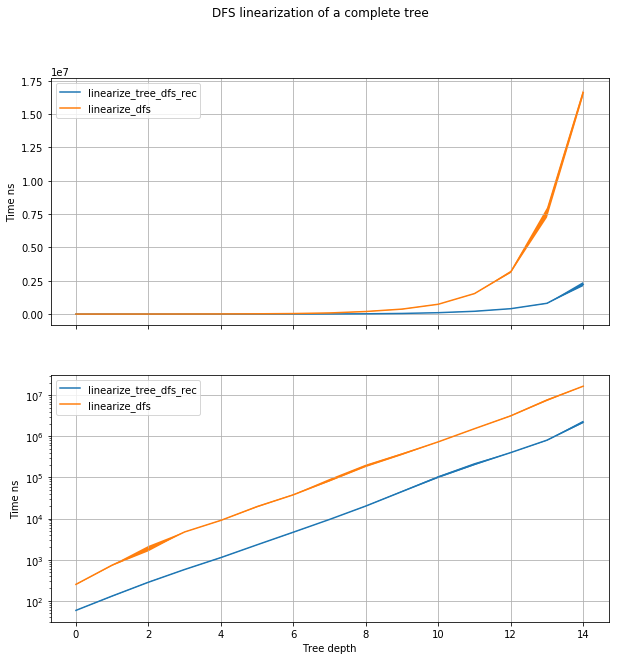

In [93]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

linearize_tree_dfs_rec_mean_y = [float(x) for x in linearize_tree_dfs_rec_mean.index]
linearize_dfs_mean_y  = [float(x) for x in linearize_dfs_mean.index]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,10))
fig.suptitle('DFS linearization of a complete tree')

ax1.plot(linearize_tree_dfs_rec_mean_y, linearize_tree_dfs_rec_mean, label='linearize_tree_dfs_rec')
ax1.fill_between(linearize_tree_dfs_rec_mean_y,  linearize_tree_dfs_rec_min, linearize_tree_dfs_rec_max)

ax1.plot(linearize_dfs_mean_y, linearize_dfs_mean, label='linearize_dfs')
ax1.fill_between(linearize_dfs_mean_y,  linearize_dfs_min,  linearize_dfs_max)

ax1.set(ylabel='Time ns')
ax1.grid()
ax1.legend()

ax2.plot(linearize_tree_dfs_rec_mean_y, linearize_tree_dfs_rec_mean, label='linearize_tree_dfs_rec')
ax2.fill_between(linearize_tree_dfs_rec_mean_y,  linearize_tree_dfs_rec_min, linearize_tree_dfs_rec_max)

ax2.plot(linearize_dfs_mean_y, linearize_dfs_mean, label='linearize_dfs')
ax2.fill_between(linearize_dfs_mean_y,  linearize_dfs_min,  linearize_dfs_max)
ax2.set(yscale='log')

ax2.set(xlabel='Tree depth', ylabel='Time ns')
ax2.grid()
ax2.legend()

plt.savefig("linearize_dfs_tree.png", dpi=300)